# GridSearch CV 

In [90]:
import pandas as pd
#import data
data = pd.read_table("breast-cancer-wisconsin.data", sep =",")


C:\Users\zeesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
data.head(5)

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [92]:
data.columns = ['Sample Code Number','Clump Thickness','Uniformity of Cell Size',
                                                        'Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size',
                                                        'Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [93]:
data.tail(5)

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


In [94]:
data.sample(4)

,Sample Code Number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
75,1132347,1,1,4,1,2,1,2,1,1,2
244,1287775,5,1,1,2,2,2,3,1,1,2
672,1354840,5,3,2,1,3,1,1,1,1,2
62,1116132,6,3,4,1,5,2,3,9,1,4


In [95]:
data = data.drop(['Sample Code Number'],axis=1) #Drop 1st column
data = data[data['Bare Nuclei'] != '?'] #Remove rows with missing data


In [96]:
import numpy as np
data['Class'] = np.where(data['Class'] == 2,0,1) #Change the Class representation
data['Class'].value_counts() #Class distribution

0    443
1    239
Name: Class, dtype: int64

In [97]:
#Split data into attributes and class
X = data.drop(['Class'],axis=1)
y = data['Class']

In [98]:
#perform training and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [99]:
#Dummy Classifier
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent').fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [100]:
#Distribution of y test
print('y actual : \n' +  str(y_test.value_counts()))

y actual : 
0    112
1     59
Name: Class, dtype: int64


In [101]:

#Distribution of y predicted
print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y predicted : 
0    171
dtype: int64


In [102]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.6549707602339181
Precision Score : 0.0
Recall Score : 0.0
F1 Score : 0.0


C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Confusion Matrix : 
[[112   0]
 [ 59   0]]


In [104]:
cm=confusion_matrix(y_test,y_pred)

Text(41.0, 0.5, 'Truth')

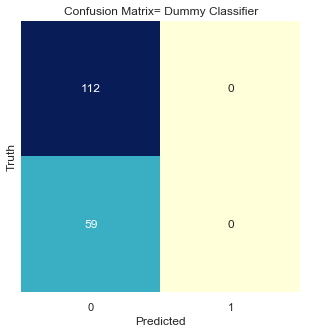

In [105]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap='YlGnBu', cbar= False, annot=True, yticklabels = False, fmt="d")

plt.title('Confusion Matrix= Dummy Classifier')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [106]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(X_train,y_train)
y_pred = clf.predict(X_test)


C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [107]:
# Model Evaluation metrics 
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))


#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.9532163742690059
Precision Score : 0.9636363636363636
Recall Score : 0.8983050847457628
F1 Score : 0.9298245614035089
Confusion Matrix : 
[[110   2]
 [  6  53]]


In [108]:
cm=confusion_matrix(y_test,y_pred)

Text(41.0, 0.5, 'Truth')

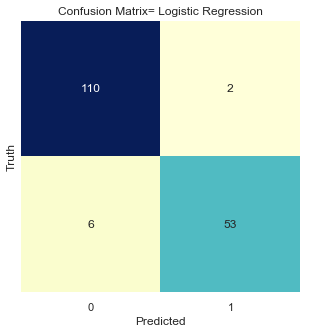

In [109]:

plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap='YlGnBu', cbar= False, annot=True, yticklabels = False, fmt="d")

plt.title('Confusion Matrix= Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [110]:

#Grid Search
from sklearn.model_selection import GridSearchCV
clf = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'recall')
grid_clf_acc.fit(X_train, y_train)

C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default s

C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\zeesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [111]:
#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)

In [112]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_acc)))

Accuracy Score : 0.9064327485380117
Precision Score : 0.7945205479452054
Recall Score : 0.9830508474576272
F1 Score : 0.8787878787878787


In [113]:
#Logistic Regression (Grid Search) Confusion matrix
cm= confusion_matrix(y_test,y_pred_acc)
cm

array([[97, 15],
       [ 1, 58]], dtype=int64)

Text(41.0, 0.5, 'Truth')

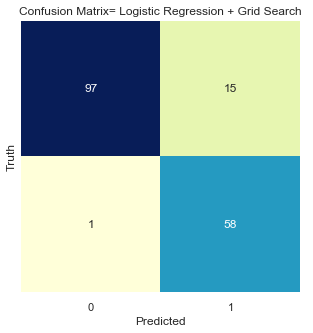

In [114]:

plt.figure(figsize=(5,5))
sns.heatmap(cm, cmap='YlGnBu', cbar= False, annot=True, yticklabels = False, fmt="d")

plt.title('Confusion Matrix= Logistic Regression + Grid Search')
plt.xlabel('Predicted')
plt.ylabel('Truth')